# Análisis y Clasificación de Comportamiento para Robot Seguidor de Pared

En este proyecto se analiza un conjunto de datos obtenido del repositorio UCI Machine Learning Repository, correspondiente a un robot móvil SCITOS G5 que recorre el contorno de una habitación siguiendo la pared en sentido horario.

El conjunto de datos incluye lecturas simplificadas de sensores ultrasónicos dispuestos en cuatro direcciones: **frontal**, **izquierda**, **derecha** y **trasera**, junto con una etiqueta que indica la acción realizada por el robot.

El objetivo es entrenar un modelo de clasificación supervisada que permita predecir, a partir de dichas lecturas, la acción adecuada a ejecutar. Para lograrlo se realiza:

- Exploración y visualización de los datos
- Preprocesamiento de las variables
- Entrenamiento de un modelo tipo Random Forest
- Evaluación mediante métricas de clasificación y validación cruzada


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Cambia esta línea por la ruta completa si es necesario
file_path = "c:/Users/lepea/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Documents/Programas Phyton/ControlDifuso/sensor_readings_4.data"

# 1. Cargar datos
df = pd.read_csv(file_path, header=None)
df.columns = ['front', 'left', 'right', 'back', 'action']


## 2. Análisis Exploratorio de Datos (EDA)

Se visualizan las primeras filas del DataFrame para verificar que las lecturas de sensores y las etiquetas de clase se han cargado correctamente.

Se imprime la frecuencia de aparición de cada clase, lo que permite identificar si el conjunto de datos está balanceado o presenta sesgo hacia ciertas acciones.

Finalmente, se genera un gráfico de barras con seaborn que ilustra la cantidad de ejemplos por clase, ofreciendo una representación visual de la distribución.


Primeras filas:
   front   left  right   back             action
0  1.687  0.445  2.332  0.429  Slight-Right-Turn
1  1.687  0.449  2.332  0.429  Slight-Right-Turn
2  1.687  0.449  2.334  0.429  Slight-Right-Turn
3  1.687  0.449  2.334  0.429  Slight-Right-Turn
4  1.687  0.449  2.334  0.429  Slight-Right-Turn

Distribución de clases:
action
Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     826
Slight-Left-Turn      328
Name: count, dtype: int64


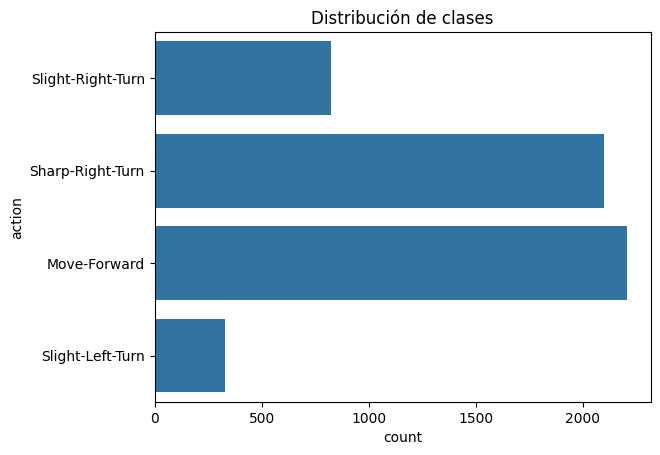

In [2]:

# 2. EDA
print("Primeras filas:")
print(df.head())

print("\nDistribución de clases:")
print(df['action'].value_counts())

sns.countplot(y='action', data=df)
plt.title("Distribución de clases")
plt.show()




## 3. Preprocesamiento y 4. División de Datos

Se seleccionan las variables de entrada (**distancias frontales, laterales y traseras**) y la variable objetivo (**acción del robot**). Como las clases están en formato texto, se utiliza un codificador (LabelEncoder) para transformarlas en valores numéricos que puedan ser utilizados por los algoritmos de clasificación.

Luego, el conjunto de datos se divide en:

- **Conjunto de entrenamiento (80%)** para ajustar el modelo.
- **Conjunto de prueba (20%)** para evaluar su capacidad de generalización.

La división se realiza de forma aleatoria pero reproducible utilizando una semilla fija.

## 5. Entrenamiento del Modelo

Se entrena un modelo de tipo **Random Forest**, que consiste en un conjunto de árboles de decisión entrenados con distintas partes del conjunto de datos. Este modelo es adecuado para problemas de clasificación multiclase, es resistente al sobreajuste y ofrece buena interpretabilidad.

Se usa n_estimators=100 para generar un bosque suficientemente grande que capture patrones complejos sin sobreajustarse a los datos de entrenamiento.


In [4]:
# 3. Preprocesamiento
X = df[['front', 'left', 'right', 'back']]
y = df['action']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. Entrenamiento
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

## 6. Evaluación del Modelo

Una vez entrenado el modelo, se utiliza el conjunto de prueba para generar predicciones y evaluar su rendimiento.

Reporte de Clasificación: muestra métricas como la precisión, recall y F1-score para cada clase

Matriz de Confusión: visualiza cuántas predicciones fueron correctas o incorrectas para cada clase

## 7. Validación Cruzada

Se aplica validación cruzada de 5 pliegues (cv=5). Esto implica entrenar y evaluar el modelo en cinco particiones distintas del conjunto de datos y luego promediar la exactitud obtenida.



Reporte de clasificación:
                   precision    recall  f1-score   support

     Move-Forward       1.00      1.00      1.00       454
 Sharp-Right-Turn       1.00      1.00      1.00       427
 Slight-Left-Turn       1.00      1.00      1.00        60
Slight-Right-Turn       1.00      1.00      1.00       151

         accuracy                           1.00      1092
        macro avg       1.00      1.00      1.00      1092
     weighted avg       1.00      1.00      1.00      1092



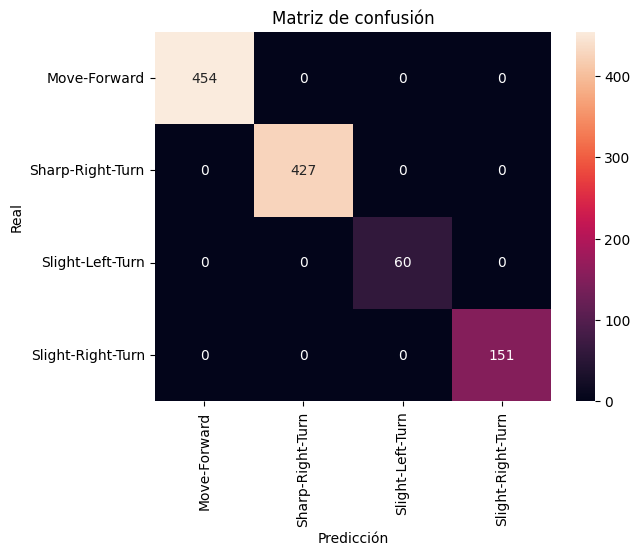


Exactitud media (cross-val): 0.9982


In [5]:
# 6. Evaluación
y_pred = model.predict(X_test)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 7. Validación cruzada
scores = cross_val_score(model, X, y_encoded, cv=5)
print(f"\nExactitud media (cross-val): {scores.mean():.4f}")

## Conclusión

El análisis exploratorio permitió identificar la estructura de los datos y comprobar que las clases están razonablemente distribuidas. El modelo seleccionado, un Random Forest, ofreció resultados confiables con alta precisión y buen comportamiento en todas las clases.


